In [1]:
import xarray as xr
import netCDF4

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

In [3]:
off_noah=xr.open_dataset('/mnt/f/wrf/wrf_case_2009/wrfout_d01_2009-07-01_12_00_00_without_noah')
on_noah=xr.open_dataset('/mnt/f/wrf/wrf_case_2009/wrfout_d01_2009-07-01_12_00_00_open_noah')
urban_test=xr.open_dataset('/mnt/f/wrf/wrf_case_2009/wrfout_d01_2009-07-01_12_00_00')

In [4]:
urban_test

<xarray.Dataset>
Dimensions:                (Time: 5, bottom_top: 32, bottom_top_stag: 33, seed_dim_stag: 2, soil_layers_stag: 4, south_north: 60, south_north_stag: 61, west_east: 73, west_east_stag: 74)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, seed_dim_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    VAR_SSO                (Time, south_north, west_east) float32 ...
    U                      (Time, bottom_top, south_north, west_east_stag) float32 ...
    V                      (Time, bottom_top, south_north_stag, west_east) float32 ...
    W                      (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 ...
    T                      (Time, bottom_top, south_north, west_east) float32 ...
    THM                    (Time, bottom_top, south_north, west_east) float32 ...
    HFX_FORCE              (Time) float32 ...
    LH_FORCE               (Time) float32 ...
    TSK_FORCE              (Time) float32 ...
    HFX_FORCE_TEND         (Time) float32 ...
    LH_FORCE_TEND          (Time) float32 ...
    TSK_FORCE_TEND         (Time) float32 ...
    MU                     (Time, south_north, west_east) float32 ...
    MUB                    (Time, south_north, west_east) float32 ...
    NEST_POS               (Time, south_north, west_east) float32 ...
    P                      (Time, bottom_top, south_north, west_east) float32 ...
    PB                     (Time, bottom_top, south_north, west_east) float32 ...
    FNM                    (Time, bottom_top) float32 ...
    FNP                    (Time, bottom_top) float32 ...
    RDNW                   (Time, bottom_top) float32 ...
    RDN                    (Time, bottom_top) float32 ...
    DNW                    (Time, bottom_top) float32 ...
    DN                     (Time, bottom_top) float32 ...
    CFN                    (Time) float32 ...
    CFN1                   (Time) float32 ...
    THIS_IS_AN_IDEAL_RUN   (Time) int32 ...
    P_HYD                  (Time, bottom_top, south_north, west_east) float32 ...
    Q2                     (Time, south_north, west_east) float32 ...
    T2                     (Time, south_north, west_east) float32 ...
    TH2                    (Time, south_north, west_east) float32 ...
    PSFC                   (Time, south_north, west_east) float32 ...
    U10                    (Time, south_north, west_east) float32 ...
    V10                    (Time, south_north, west_east) float32 ...
    RDX                    (Time) float32 ...
    RDY                    (Time) float32 ...
    AREA2D                 (Time, south_north, west_east) float32 ...
    DX2D                   (Time, south_north, west_east) float32 ...
    RESM                   (Time) float32 ...
    ZETATOP                (Time) float32 ...
    CF1                    (Time) float32 ...
    CF2                    (Time) float32 ...
    CF3                    (Time) 

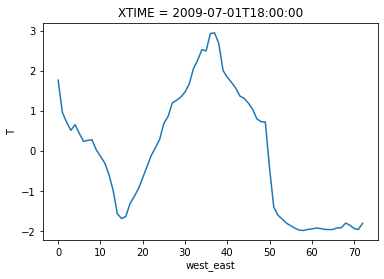

In [5]:
aa=on_noah['T'].sel(Time=2,bottom_top=0).groupby('west_east')
aa.mean('south_north').plot()

In [6]:
aa

DataArrayGroupBy, grouped over 'west_east' 
73 groups with labels 0, 1, 2, 3, 4, 5, ..., 68, 69, 70, 71, 72.

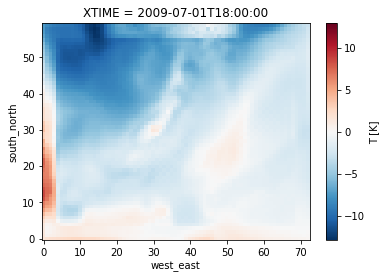

In [7]:
urban_test['T'].sel(Time=2,bottom_top=0).plot()

In [8]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

In [9]:
urban_test['west_east']

<xarray.DataArray 'west_east' (west_east: 73)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72])
Dimensions without coordinates: west_east

In [10]:
tem.sel(south_north=30,west_east=30)

NameError: name 'tem' is not defined

In [16]:
lons=urban_test['XLONG'].sel(Time=1, south_north=1)
lats=urban_test['XLAT'].sel(Time=1, west_east=1)
tem=urban_test['T'].sel(Time=4,bottom_top=0)

In [ ]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs

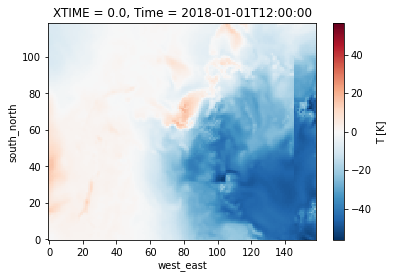

In [12]:
test=Dataset('/mnt/e/wrf_tibet/model_configure/wrfout_d01_2018-01-01_12_00_00')
tt=getvar(test,'T')
tt[5].plot()

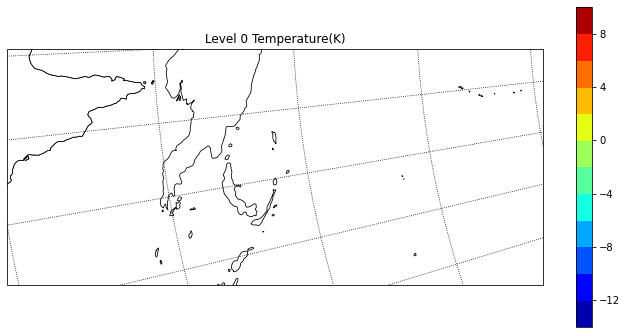

In [17]:
smooth_slp = tem


# Get the cartopy mapping object
cart_proj = get_cartopy(tt)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_extent([lon.values.min(),lat.values.min(),lon.values.max(),lat.values.max()])
#ax.set_xlim(lon.values.min(),lon.values.max())
#ax.set_ylim(lat.values.min(),lat.values.max())
#ax.set_xticks(lon.values)
#ax.set_yticks(lat.values)
ax.set_xlim(cartopy_xlim(tt))
ax.set_ylim(cartopy_ylim(tt))
#ax.set_xticks(lon.values)
#ax.set_yticks(lat.values)
# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Level 0 Temperature(K)")

plt.show()

In [18]:
lon.values.min()

-93.632385